In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Избавление от пустых значений

In [100]:
none_count = train_data['RiskScore'].isnull().sum()

total_count = len(train_data['RiskScore'])

none_percentage = (none_count / total_count) * 100

print(f"Количество None значений в RiskScore: {none_count}")
print(f"Процент None значений в RiskScore: {none_percentage:.2f}%")

Количество None значений в RiskScore: 530
Процент None значений в RiskScore: 4.81%


Удалим строки с пустым значением RiskScore

In [101]:
train_data.dropna(subset=['RiskScore'], axis='rows', inplace=True)

Остальные пропуски

In [102]:
missing_data = train_data.isnull().sum()
missing_percentage = (train_data.isnull().sum() / len(train_data)) * 100

missing_data_summary = pd.DataFrame({'Missing Count': missing_data, 'Missing Percentage': missing_percentage})

print(missing_data_summary)

                            Missing Count  Missing Percentage
ApplicationDate                         0            0.000000
Age                                     0            0.000000
AnnualIncome                            0            0.000000
CreditScore                           501            4.777343
LoanAmount                            501            4.777343
LoanDuration                            0            0.000000
MaritalStatus                           0            0.000000
NumberOfDependents                      0            0.000000
HomeOwnershipStatus                     0            0.000000
MonthlyDebtPayments                   501            4.777343
CreditCardUtilizationRate               0            0.000000
NumberOfOpenCreditLines                 0            0.000000
NumberOfCreditInquiries                 0            0.000000
DebtToIncomeRatio                       0            0.000000
BankruptcyHistory                     501            4.777343
LoanPurp

Разобьём признаки по категориям.
Пропуски в числовых признаках заменим средним значением, а в категориальных заменим модой.

In [103]:
numerical_features = train_data.drop(columns='RiskScore').select_dtypes(include=np.number).columns
categorical_features = train_data.drop(columns='RiskScore').select_dtypes(exclude=np.number).columns

print("Числовые признаки:")
print(numerical_features)
print("\nКатегориальные признаки:")
print(categorical_features)

Числовые признаки:
Index(['Age', 'AnnualIncome', 'CreditScore', 'LoanAmount', 'LoanDuration',
       'NumberOfDependents', 'MonthlyDebtPayments',
       'CreditCardUtilizationRate', 'NumberOfOpenCreditLines',
       'NumberOfCreditInquiries', 'DebtToIncomeRatio', 'BankruptcyHistory',
       'PreviousLoanDefaults', 'PaymentHistory', 'LengthOfCreditHistory',
       'SavingsAccountBalance', 'CheckingAccountBalance', 'TotalAssets',
       'TotalLiabilities', 'MonthlyIncome', 'UtilityBillsPaymentHistory',
       'JobTenure', 'Experience', 'NetWorth', 'BaseInterestRate',
       'InterestRate', 'MonthlyLoanPayment', 'TotalDebtToIncomeRatio',
       'LoanApproved'],
      dtype='object')

Категориальные признаки:
Index(['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus',
       'LoanPurpose', 'EmploymentStatus', 'EducationLevel'],
      dtype='object')


In [104]:
train_data[numerical_features] = train_data[numerical_features].fillna(train_data[numerical_features].mean())
train_data[categorical_features] = train_data[categorical_features].fillna(train_data[categorical_features].mode().iloc[0])

print(train_data.isnull().sum())

ApplicationDate               0
Age                           0
AnnualIncome                  0
CreditScore                   0
LoanAmount                    0
LoanDuration                  0
MaritalStatus                 0
NumberOfDependents            0
HomeOwnershipStatus           0
MonthlyDebtPayments           0
CreditCardUtilizationRate     0
NumberOfOpenCreditLines       0
NumberOfCreditInquiries       0
DebtToIncomeRatio             0
BankruptcyHistory             0
LoanPurpose                   0
PreviousLoanDefaults          0
PaymentHistory                0
LengthOfCreditHistory         0
SavingsAccountBalance         0
CheckingAccountBalance        0
TotalAssets                   0
TotalLiabilities              0
MonthlyIncome                 0
UtilityBillsPaymentHistory    0
JobTenure                     0
EmploymentStatus              0
EducationLevel                0
Experience                    0
NetWorth                      0
BaseInterestRate              0
Interest

# Удаление повторяющихйся строк

In [105]:
train_data.shape[0]

10487

In [106]:
train_data = train_data.drop_duplicates()

train_data.shape[0]

10000

# Преобразование категориальных признаков

Преобразуем ApplicationDate в количество дней с 1970-01-01

In [107]:
train_data_copy = train_data.copy()
test_data_copy = test_data.copy()

train_data_copy['ApplicationDate'] = (pd.to_datetime(train_data_copy['ApplicationDate']) - pd.to_datetime('1970-01-01')).dt.days
test_data_copy['ApplicationDate'] = (pd.to_datetime(test_data_copy['ApplicationDate']) - pd.to_datetime('1970-01-01')).dt.days

train_data = train_data_copy
test_data = test_data_copy

Рассмотрим возможные значения остальных категориальных признаков

In [108]:
for column in categorical_features.drop('ApplicationDate'):
    unique_values = train_data[column].unique()
    print(f"{column}: {unique_values}")

MaritalStatus: ['Divorced' 'Widowed' 'Married' 'Single']
HomeOwnershipStatus: ['Rent' 'Mortgage' 'Other' 'Own']
LoanPurpose: ['Education' 'Home' 'Debt Consolidation' 'Auto' 'Other']
EmploymentStatus: ['Employed' 'Self-Employed' 'Unemployed']
EducationLevel: ['Associate' 'High School' 'Bachelor' 'Master' 'Doctorate']


In [109]:
def calculate_average_riskscore(train_data, category_column):
    filtered_data = train_data[(train_data['RiskScore'] <= 100) & (train_data['RiskScore'] >= 0)]
    average_riskscore = filtered_data.groupby(category_column)['RiskScore'].mean()

    return average_riskscore

for column in categorical_features.drop('ApplicationDate'):
    print(calculate_average_riskscore(train_data, column))

MaritalStatus
Divorced    47.689811
Married     48.588624
Single      48.340548
Widowed     47.603385
Name: RiskScore, dtype: float64
HomeOwnershipStatus
Mortgage    48.049230
Other       48.300582
Own         48.601923
Rent        48.505805
Name: RiskScore, dtype: float64
LoanPurpose
Auto                  48.214431
Debt Consolidation    47.909616
Education             49.268899
Home                  48.034415
Other                 49.111166
Name: RiskScore, dtype: float64
EmploymentStatus
Employed         47.978243
Self-Employed    50.096981
Unemployed       51.558991
Name: RiskScore, dtype: float64
EducationLevel
Associate      48.205001
Bachelor       48.149467
Doctorate      45.991914
High School    49.004093
Master         46.660304
Name: RiskScore, dtype: float64


Для EducationLevel и EmploymentStatus применим порядквое кодирование

In [110]:
education_mapping = {'Doctorate': 0, 'Master': 1, 'Bachelor': 2, 'Associate': 3, 'High School': 4}

train_data['EducationLevel'] = train_data['EducationLevel'].map(education_mapping)
test_data['EducationLevel'] = test_data['EducationLevel'].map(education_mapping)

employment_mapping = {'Employed': 0, 'Self-Employed': 1, 'Unemployed': 2}

train_data['EmploymentStatus'] = train_data['EmploymentStatus'].map(employment_mapping)
test_data['EmploymentStatus'] = test_data['EmploymentStatus'].map(employment_mapping)

В остальных случаях применим One-Hot Encoding

In [111]:
train_data = pd.get_dummies(train_data, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'], prefix=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'])
test_data = pd.get_dummies(test_data, columns=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'], prefix=['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose'])

# Устранение выбросов RiskScore

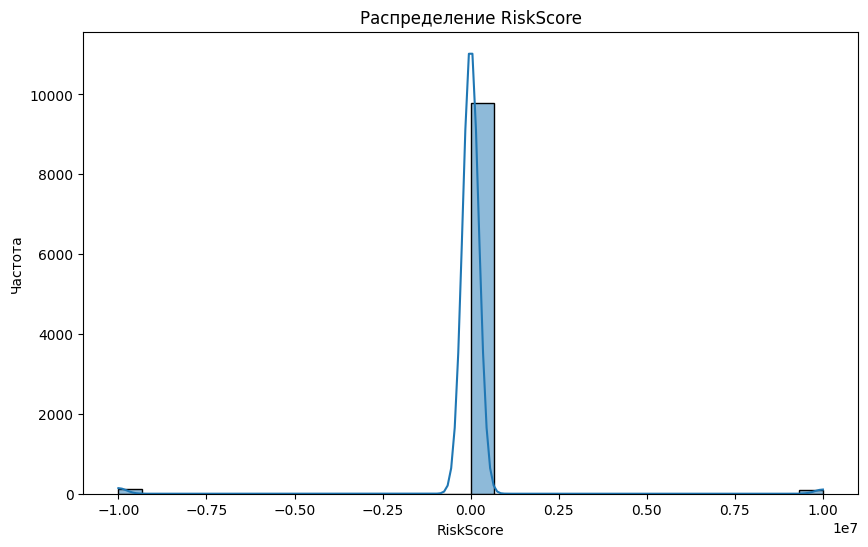

In [112]:
def distribution_schedule(data, column_name):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[column_name], bins=30, kde=True)
    plt.title(f'Распределение {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Частота')
    plt.show()

distribution_schedule(train_data, 'RiskScore')

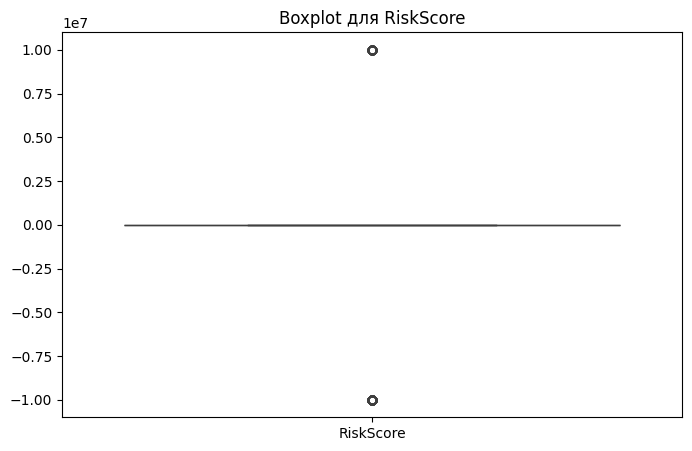

In [113]:
def plot_boxplot(data, column_name):
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=data[[column_name]])
    plt.title(f'Boxplot для {column_name}')
    plt.show()

plot_boxplot(train_data, 'RiskScore')

Значения RiskScore не могут быть отрицательными и больше, чем 100%. Удалим выбросы, которые этому не соответсвуют.

In [114]:
train_data = train_data[(train_data['RiskScore'] >= 0) & (train_data['RiskScore'] <= 100)]

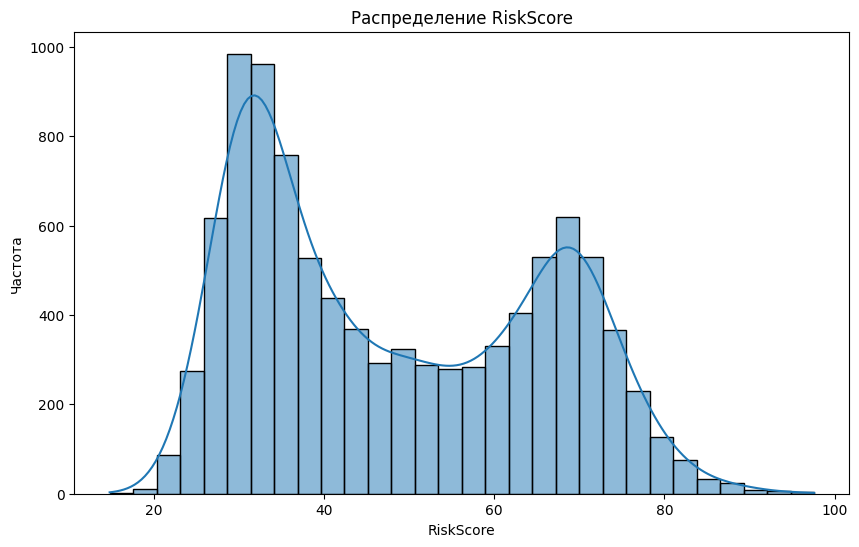

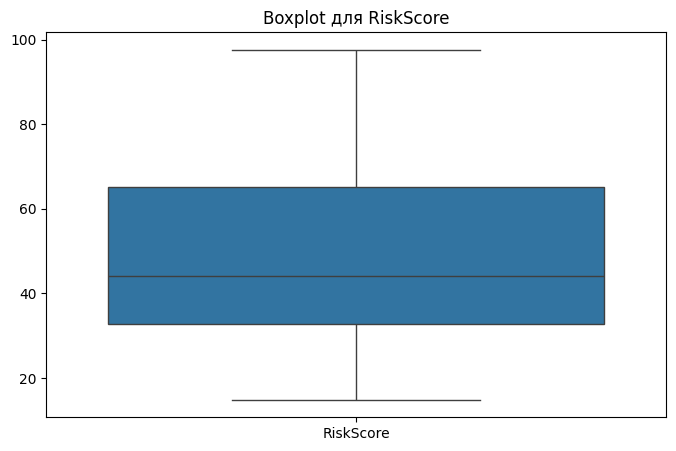

In [115]:
distribution_schedule(train_data, 'RiskScore')
plot_boxplot(train_data, 'RiskScore')

# Корреляция признаков

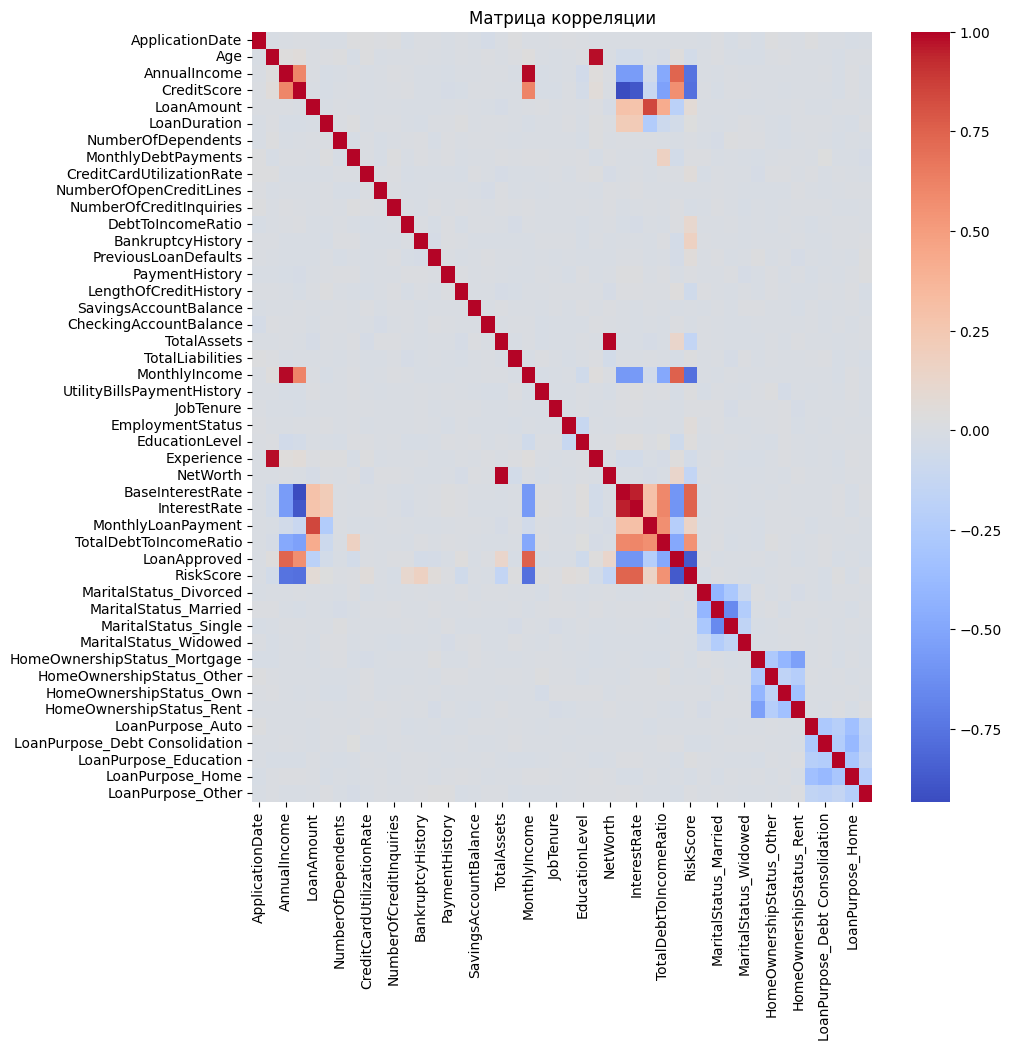

In [116]:
correlation_matrix = train_data.corr()

plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Матрица корреляции')
plt.show()

In [117]:
correlation_with_riskscore = correlation_matrix['RiskScore']

weak_correlation_mask = abs(correlation_with_riskscore) < 0.01

weakly_correlated_features = correlation_with_riskscore[weak_correlation_mask].index

print("Признаки с корреляцией к RiskScore меньше 0.01:")
print(weakly_correlated_features)

Признаки с корреляцией к RiskScore меньше 0.01:
Index(['ApplicationDate', 'NumberOfDependents', 'NumberOfOpenCreditLines',
       'SavingsAccountBalance', 'CheckingAccountBalance',
       'MaritalStatus_Single', 'MaritalStatus_Widowed',
       'HomeOwnershipStatus_Other', 'HomeOwnershipStatus_Own',
       'HomeOwnershipStatus_Rent', 'LoanPurpose_Auto'],
      dtype='object')


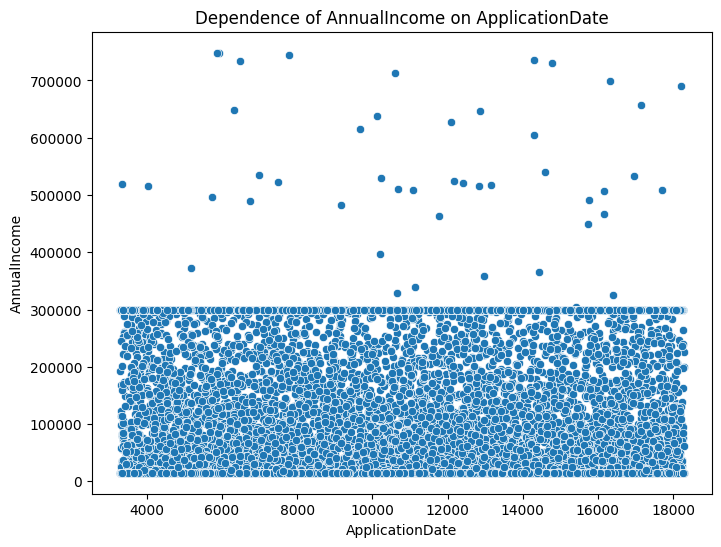

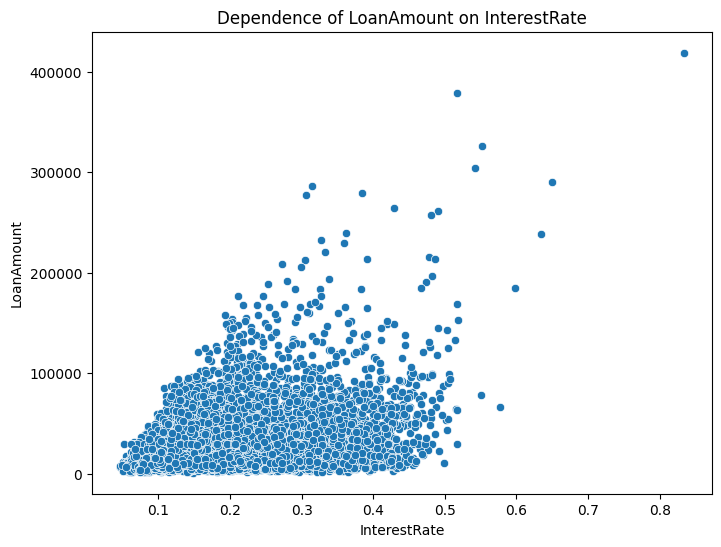

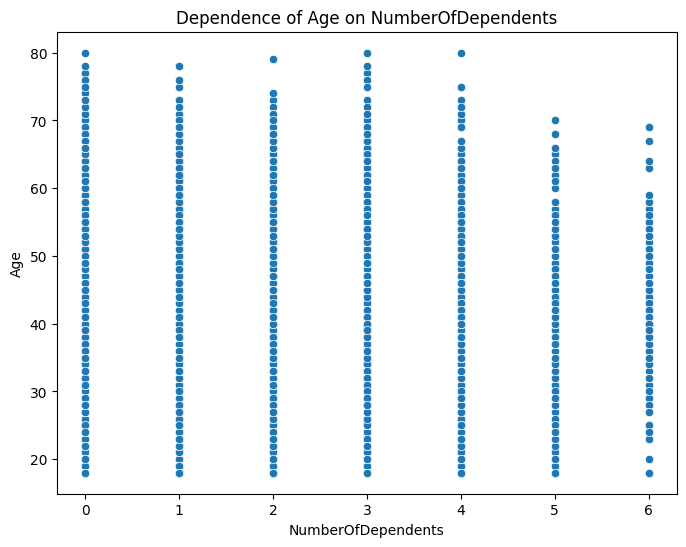

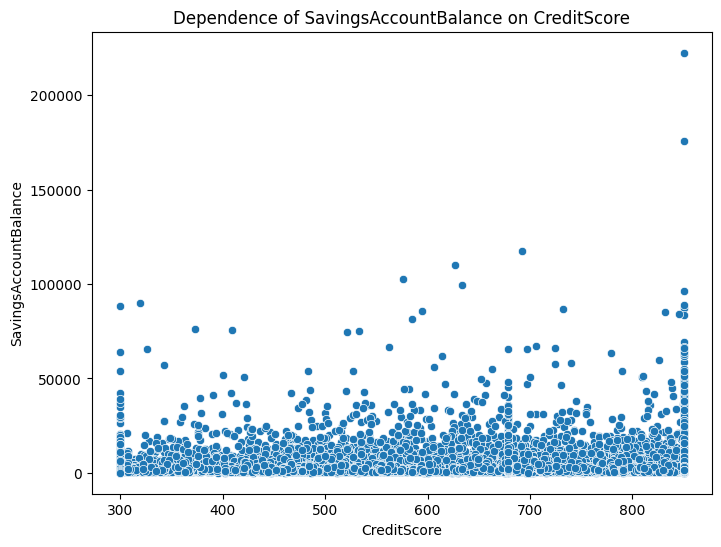

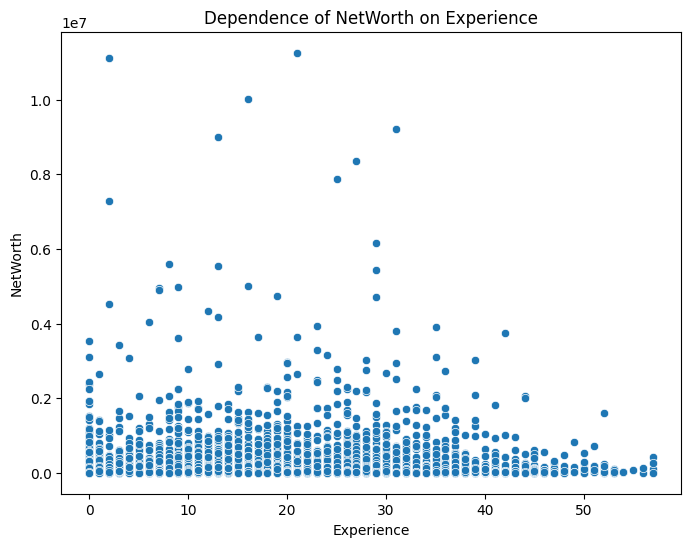

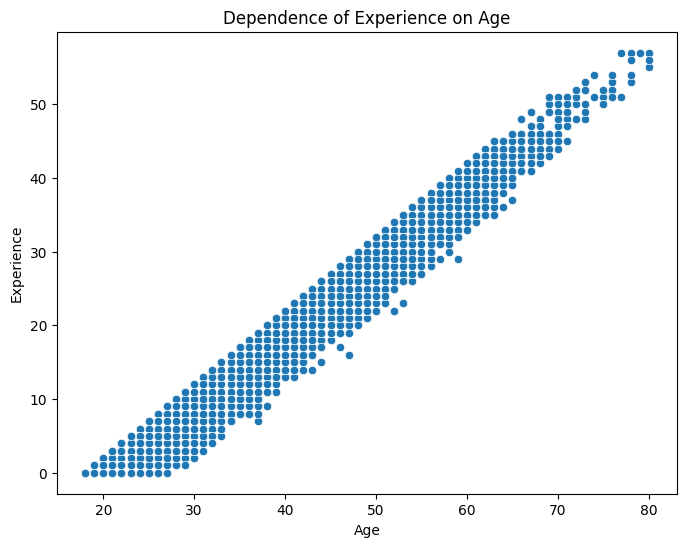

In [118]:
def show_dependence_scatter(data, param1, param2):
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=param1, y=param2, data=data)
    plt.title(f"Dependence of {param2} on {param1}")
    plt.xlabel(param1)
    plt.ylabel(param2)
    plt.show()

show_dependence_scatter(train_data, 'ApplicationDate', 'AnnualIncome')
show_dependence_scatter(train_data, 'InterestRate', 'LoanAmount')
show_dependence_scatter(train_data, 'NumberOfDependents', 'Age')
show_dependence_scatter(train_data, 'CreditScore', 'SavingsAccountBalance')
show_dependence_scatter(train_data, 'Experience', 'NetWorth')
show_dependence_scatter(train_data, 'Age', 'Experience')

# Мультиколлинеарность

Найдём наиболее коррелирующие признаки

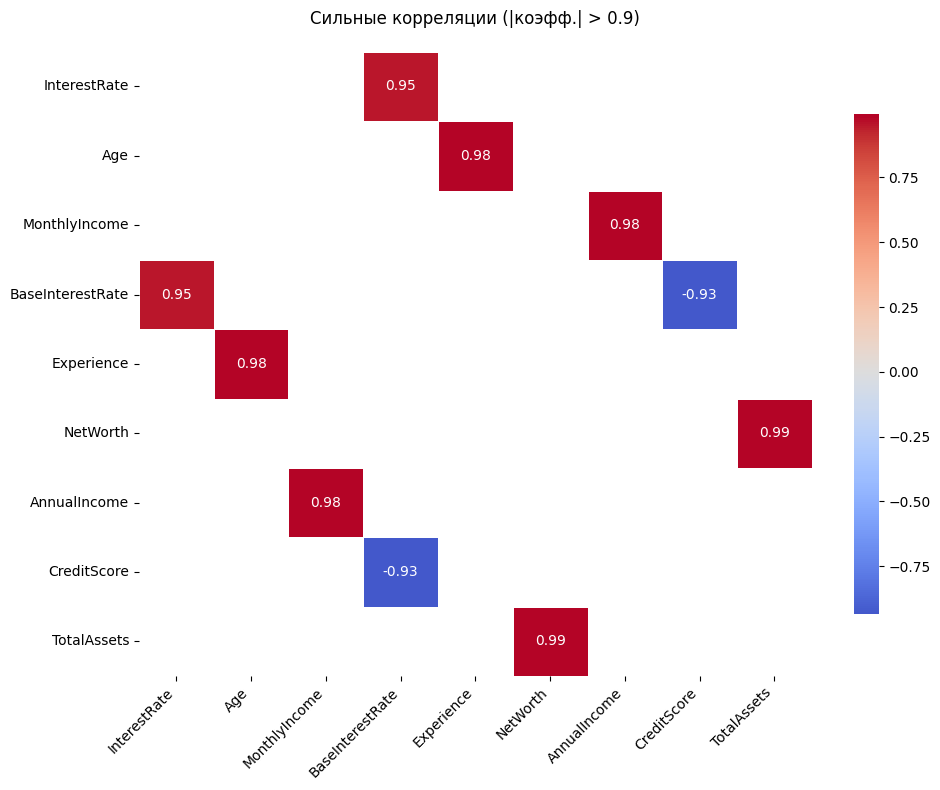

In [119]:
def show_strong_correlations(df, threshold=0.5):
    features = df.drop(columns=['RiskScore'])

    corr_matrix = features.corr()
    strong_pairs = (np.abs(corr_matrix) > threshold) & (corr_matrix != 1.0)

    selected_features = set()
    for col in strong_pairs.columns:
        if strong_pairs[col].any():
            selected_features.add(col)
    selected_features = list(selected_features)

    filtered_corr = corr_matrix.loc[selected_features, selected_features]

    if len(selected_features) > 0:
        plt.figure(figsize=(10, 8))

        mask = (np.abs(filtered_corr) <= threshold) | (np.eye(len(filtered_corr), dtype=bool))

        sns.heatmap(filtered_corr, annot=True, fmt=".2f", cmap='coolwarm',
                   center=0, mask=mask, linewidths=.5,
                   annot_kws={"size": 10}, cbar_kws={"shrink": .8})

        plt.title(f'Сильные корреляции (|коэфф.| > {threshold})', pad=20)
        plt.xticks(rotation=45, ha='right')
        plt.yticks(rotation=0)
        plt.tight_layout()
        plt.show()
    else:
        print(f'Нет пар признаков с корреляцией > {threshold} по модулю')

show_strong_correlations(train_data, threshold=0.9)

In [120]:
def show_correlation_matrix(df):
    corr_matrix = df.corr()
    plt.figure(figsize=(8, 6))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".3f")
    plt.title('Матрица корреляции')
    plt.show()

Возраст и опыт связанны напрямую. Удалим параметр, который меньше коррелирует с RiskScore.

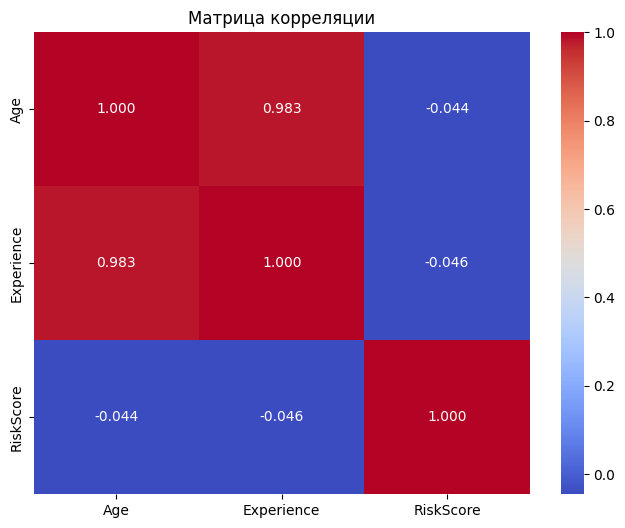

In [121]:
show_correlation_matrix(train_data[['Age', 'Experience', 'RiskScore']])

In [122]:
train_data.drop('Age', axis=1, inplace=True)
test_data.drop('Age', axis=1, inplace=True)

Аналогично поступим со всеми признаками с максимальной корреляцией.

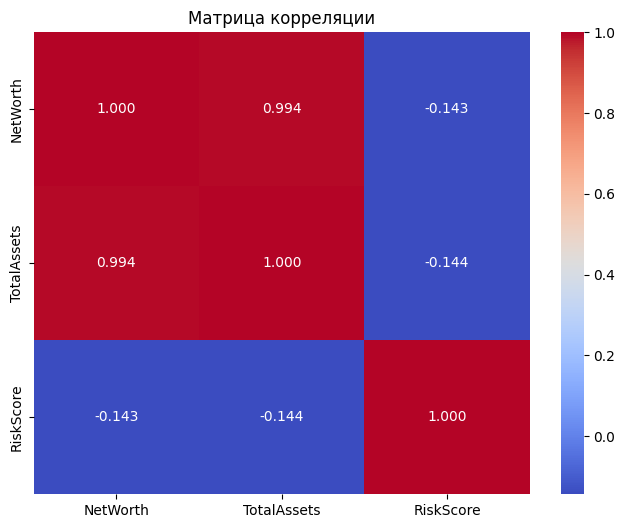

In [123]:
show_correlation_matrix(train_data[['NetWorth', 'TotalAssets', 'RiskScore']])

In [124]:
train_data.drop('NetWorth', axis=1, inplace=True)
test_data.drop('NetWorth', axis=1, inplace=True)

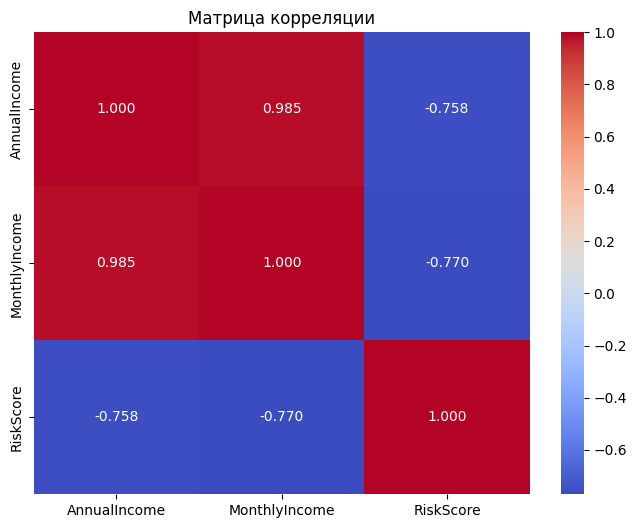

In [125]:
show_correlation_matrix(train_data[['AnnualIncome', 'MonthlyIncome', 'RiskScore']])

In [126]:
train_data.drop('MonthlyIncome', axis=1, inplace=True)
test_data.drop('MonthlyIncome', axis=1, inplace=True)

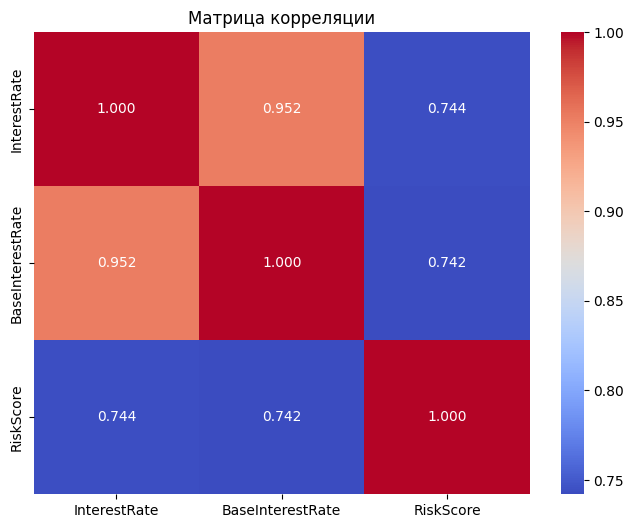

In [127]:
show_correlation_matrix(train_data[['InterestRate', 'BaseInterestRate', 'RiskScore']])

In [128]:
train_data.drop('BaseInterestRate', axis=1, inplace=True)
test_data.drop('BaseInterestRate', axis=1, inplace=True)

# Приведение к нормальному распределению признаков

Оценим, насколько распределение признака похоже на нормальное

In [129]:
from scipy.stats import normaltest, skew, kurtosis

def check_normality(data: pd.DataFrame) -> pd.DataFrame:
    results = []

    for col in data.columns:
        x = data[col].values

        if len(x) > 8:
            _, p = normaltest(x)
            s = skew(x)
            k = kurtosis(x)

            results.append({
                'feature': col,
                'p_value': p,
                'skewness': s,
                'kurtosis': k,
                'sample_size': len(x)
            })

    df_results = pd.DataFrame(results)
    df_results = df_results.sort_values('p_value', ascending=False)

    return df_results

features = train_data.drop(columns=['RiskScore'])
features = features.select_dtypes(include=np.number)
normality_results = check_normality(features)

print("Результаты проверки нормальности распределений:")
print(normality_results[['feature', 'p_value', 'skewness', 'kurtosis']])

Результаты проверки нормальности распределений:
                       feature        p_value   skewness    kurtosis
13              PaymentHistory   4.215603e-11   0.171560   -0.031856
23                  Experience   7.858797e-61   0.320957   -0.419072
20                   JobTenure   1.988323e-70   0.449500    0.243260
7    CreditCardUtilizationRate  5.556537e-108   0.580596   -0.185597
8      NumberOfOpenCreditLines  3.102975e-113   0.585678    0.331345
4                 LoanDuration  1.668199e-141   0.682346    0.234820
10           DebtToIncomeRatio  1.339024e-143   0.697254    0.112040
5           NumberOfDependents  6.262272e-151   0.719332   -0.091202
22              EducationLevel  3.206883e-161  -0.592827   -0.549971
24                InterestRate  2.097749e-161   0.751451    0.023770
1                 AnnualIncome  1.995831e-162   0.675452   -0.431247
19  UtilityBillsPaymentHistory  3.765853e-168  -0.754035    0.292363
2                  CreditScore  1.143382e-220  -0.72344

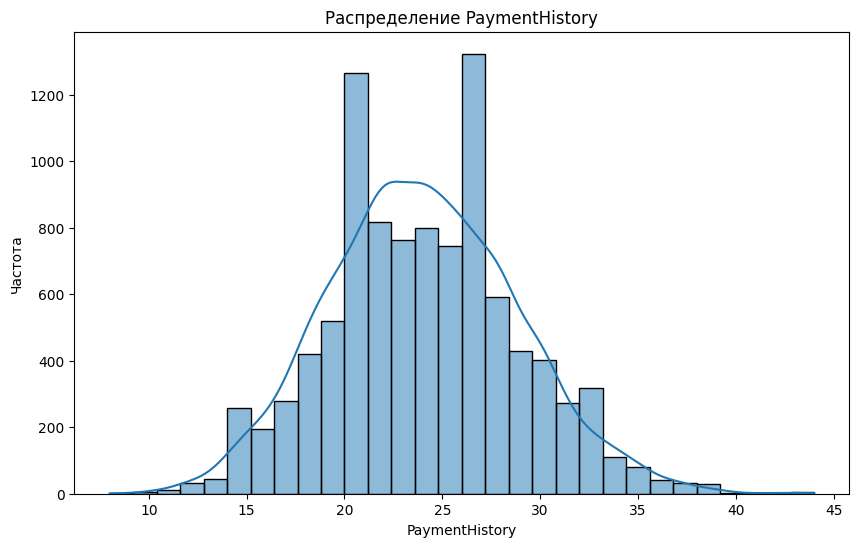

In [130]:
distribution_schedule(train_data, 'PaymentHistory')

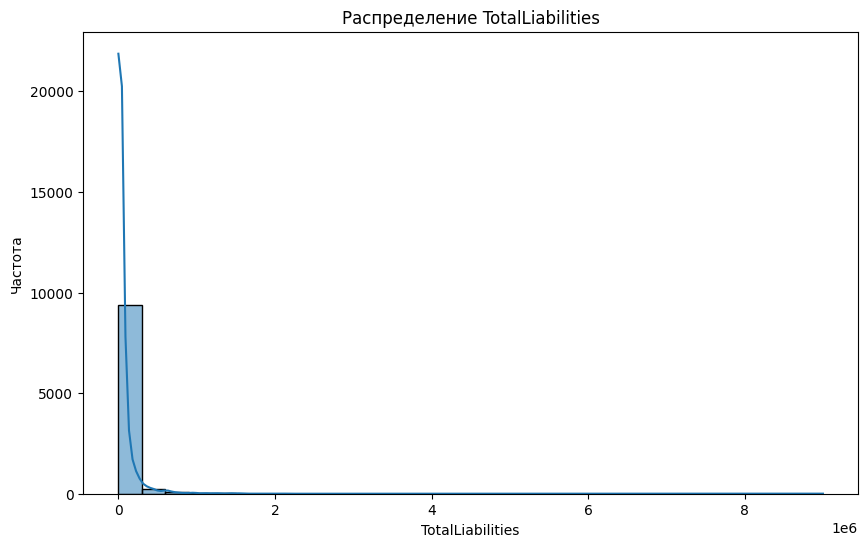

In [131]:
distribution_schedule(train_data, 'TotalLiabilities')

Логарифмирование для правосторонней асимметрии

In [132]:
for i in range(3):
  for col in train_data.drop(columns=['RiskScore']).select_dtypes(include=np.number).columns:
      if skew(train_data[col]) > 0.5:
          train_data[f"log_{col}"] = np.log1p(train_data[col])
          train_data.drop(columns=[col], inplace=True)
          test_data[f"log_{col}"] = np.log1p(test_data[col])
          test_data.drop(columns=[col], inplace=True)

# Нормализация

In [133]:
class ZScoreNormalize:
    def __init__(self):
        self.mean = 0
        self.std = 1

    def fit(self, X: np.ndarray):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0, ddof=0)
        self.std[self.std == 0] = 1.0
        return self

    def transform(self, X: np.ndarray) -> np.ndarray:
        if self.mean is None or self.std is None:
            raise ValueError("Сначала нужно вызвать fit()")
        return (X - self.mean) / self.std

    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        return self.fit(X).transform(X)

    def inverse_transform(self, X: np.ndarray) -> np.ndarray:
        if self.mean is None or self.std is None:
            raise ValueError("Сначала нужно вызвать fit()")
        return X * self.std + self.mean


class MinMaxNormalize:
    def __init__(self, feature_range=(0, 1)):
        self.feature_range = feature_range
        self.min = None
        self.max = None
        self.data_min = None
        self.data_max = None

    def fit(self, X: np.ndarray):
        self.data_min = np.min(X, axis=0)
        self.data_max = np.max(X, axis=0)
        scale = (self.feature_range[1] - self.feature_range[0]) / (self.data_max - self.data_min)
        scale[self.data_max == self.data_min] = 1.0
        self.min = self.feature_range[0] - self.data_min * scale
        self.scale = scale
        return self

    def transform(self, X: np.ndarray) -> np.ndarray:
        if self.scale is None or self.min is None:
            raise ValueError("Сначала нужно вызвать fit()")
        return X * self.scale + self.min

    def fit_transform(self, X: np.ndarray) -> np.ndarray:
        return self.fit(X).transform(X)

    def inverse_transform(self, X: np.ndarray) -> np.ndarray:
        if self.scale is None or self.min is None:
            raise ValueError("Сначала нужно вызвать fit()")
        return (X - self.min) / self.scale

In [134]:
data = np.array([[1, 2, 3],
                  [4, 5, 6],
                  [7, 8, 9]])

print("Исходные данные:")
print(data)

z_scaler = ZScoreNormalize()
z_data = z_scaler.fit_transform(data)
print("\nZ-score нормализация:")
print(z_data)
print("Обратное преобразование:")
print(z_scaler.inverse_transform(z_data))

minmax_scaler = MinMaxNormalize()
mm_data = minmax_scaler.fit_transform(data)
print("\nMin-Max нормализация:")
print(mm_data)
print("Обратное преобразование:")
print(minmax_scaler.inverse_transform(mm_data))

Исходные данные:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Z-score нормализация:
[[-1.22474487 -1.22474487 -1.22474487]
 [ 0.          0.          0.        ]
 [ 1.22474487  1.22474487  1.22474487]]
Обратное преобразование:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]

Min-Max нормализация:
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]
Обратное преобразование:
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]


# Линейная регрессия

In [135]:
from typing import Literal, Optional, Union

class MyLinearRegression:
    def __init__(self,
                 method: Literal['analytic', 'gradient', 'stochastic'] = 'analytic',
                 learning_rate: float = 0.01,
                 max_iter: int = 1000,
                 tol: float = 1e-4,
                 random_state: Optional[int] = None,
                 regularization: Optional[Literal['L1', 'L2', 'elastic_net', 'Lp']] = None,
                 alpha: float = 1.0,
                 l1_ratio: float = 0.5,
                 p: Optional[float] = None):

        self.method = method
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.tol = tol
        self.random_state = random_state
        self.weights = None
        self.loss_history = []

        self.regularization = regularization
        self.alpha = alpha
        self.l1_ratio = l1_ratio
        self.p = p

    def _add_intercept(self, X: np.ndarray) -> np.ndarray:
        intercept = np.ones((X.shape[0], 1))
        return np.hstack((intercept, X))

    def _analytic_solution(self, X: np.ndarray, y: np.ndarray) -> np.ndarray:
        if self.regularization == 'L2':
            n_features = X.shape[1]
            return np.linalg.inv(X.T.dot(X) + self.alpha * np.eye(n_features)).dot(X.T).dot(y)
        else:
            return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

    def _compute_gradient(self, X: np.ndarray, y: np.ndarray, weights: np.ndarray) -> np.ndarray:
        n_samples = X.shape[0]
        y_pred = X.dot(weights)
        error = y_pred - y.reshape(-1, 1)

        gradient = (2/n_samples) * X.T.dot(error)

        if self.regularization == 'L1':
            reg_gradient = self.alpha * np.sign(weights)
            reg_gradient[0] = 0
            gradient += reg_gradient

        elif self.regularization == 'L2':
            reg_gradient = self.alpha * 2 * weights
            reg_gradient[0] = 0
            gradient += reg_gradient

        elif self.regularization == 'elastic_net':
            l1_grad = self.alpha * self.l1_ratio * np.sign(weights)
            l2_grad = self.alpha * (1 - self.l1_ratio) * 2 * weights
            reg_gradient = l1_grad + l2_grad
            reg_gradient[0] = 0
            gradient += reg_gradient

        elif self.regularization == 'Lp' and self.p is not None:
            if self.p <= 0:
                raise ValueError("p должно быть положительным числом")
            reg_gradient = self.alpha * self.p * np.sign(weights) * np.abs(weights) ** (self.p - 1)
            reg_gradient[0] = 0
            gradient += reg_gradient

        return gradient

    def _gradient_descent(self, X: np.ndarray, y: np.ndarray):
        n_samples = X.shape[0]
        y = y.reshape(-1, 1)

        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.weights = np.random.randn(X.shape[1], 1)

        for i in range(self.max_iter):
            gradient = self._compute_gradient(X, y, self.weights)
            new_weights = self.weights - self.learning_rate * gradient

            if np.linalg.norm(new_weights - self.weights) < self.tol:
                break

            self.weights = new_weights
            self.loss_history.append(np.mean((X.dot(self.weights) - y)**2))

    def _stochastic_gradient_descent(self, X: np.ndarray, y: np.ndarray):
        n_samples = X.shape[0]
        y = y.reshape(-1, 1)

        if self.random_state is not None:
            np.random.seed(self.random_state)
        self.weights = np.random.randn(X.shape[1], 1)

        for i in range(self.max_iter):
            idx = np.random.randint(n_samples)
            x_i = X[idx:idx+1, :]
            y_i = y[idx:idx+1]

            gradient = self._compute_gradient(x_i, y_i, self.weights)

            new_weights = self.weights - self.learning_rate * gradient

            if np.linalg.norm(new_weights - self.weights) < self.tol:
                break

            self.weights = new_weights
            self.loss_history.append(np.mean((x_i.dot(self.weights) - y_i)**2))

    def fit(self, X: np.ndarray, y: np.ndarray):
        X = self._add_intercept(X)

        if self.method == 'analytic':
            if self.regularization not in [None, 'L2']:
                raise ValueError("Аналитическое решение доступно только для L2 регуляризации или без регуляризации")
            self.weights = self._analytic_solution(X, y)
        elif self.method == 'gradient':
            self._gradient_descent(X, y)
        elif self.method == 'stochastic':
            self._stochastic_gradient_descent(X, y)
        else:
            raise ValueError("Неизвестный метод. Доступные варианты: 'analytic', 'gradient', 'stochastic'")

        return self

    def predict(self, X: np.ndarray) -> np.ndarray:
        if self.weights is None:
            raise RuntimeError("Модель не обучена. Сначала вызовите fit().")

        X = self._add_intercept(X)
        return X.dot(self.weights).flatten()

In [136]:
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

lr_analytic = MyLinearRegression(method='analytic')
lr_analytic.fit(X, y)
print("Analytic weights:", lr_analytic.weights)

lr_gradient = MyLinearRegression(method='gradient', learning_rate=0.1, max_iter=1000)
lr_gradient.fit(X, y)
print("Gradient descent weights:", lr_gradient.weights)

lr_stochastic = MyLinearRegression(method='stochastic', learning_rate=0.01, max_iter=10000)
lr_stochastic.fit(X, y)
print("Stochastic gradient descent weights:", lr_stochastic.weights)

Analytic weights: [[4.21509616]
 [2.77011339]]
Gradient descent weights: [[4.21291803]
 [2.77203656]]
Stochastic gradient descent weights: [[3.5873172 ]
 [3.57845688]]


# Сравнение линейной регрессии с реализациями sklearn.

In [137]:
from sklearn.linear_model import LinearRegression as SkLinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=10, noise=0.1, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = ZScoreNormalize()
X_train_norm = scaler.fit_transform(X_train)
X_test_norm = scaler.transform(X_test)

def evaluate_mse(model, X, y_true):
    y_pred = model.predict(X)
    return mean_squared_error(y_true, y_pred)

results = {}

sk_analytic = SkLinearRegression()
sk_analytic.fit(X_train, y_train)
results['SK Analytic'] = evaluate_mse(sk_analytic, X_test, y_test)

my_analytic = MyLinearRegression(method='analytic')
my_analytic.fit(X_train, y_train)
results['Analytic'] = evaluate_mse(my_analytic, X_test, y_test)

my_gradient = MyLinearRegression(method='gradient', learning_rate=0.01, max_iter=1000)
my_gradient.fit(X_train_norm, y_train)
results['Gradient'] = evaluate_mse(my_gradient, X_test_norm, y_test)

my_stochastic = MyLinearRegression(method='stochastic', learning_rate=0.01, max_iter=1000)
my_stochastic.fit(X_train_norm, y_train)
results['Stochastic'] = evaluate_mse(my_stochastic, X_test_norm, y_test)

sgd_regressor = SGDRegressor(
    learning_rate='constant',
    eta0=0.01,
    max_iter=1000,
    tol=1e-4,
    random_state=42
)
sgd_regressor.fit(X_train_norm, y_train)
results['SK Stochastic'] = evaluate_mse(sgd_regressor, X_test_norm, y_test)

print("{:<20} {:<15}".format('Method', 'MSE'))
print("-" * 35)
for name, mse in results.items():
    print("{:<20} {:.4f}".format(name, mse))

Method               MSE            
-----------------------------------
SK Analytic          0.0095
Analytic             0.0095
Gradient             0.0095
Stochastic           0.0780
SK Stochastic        0.0104


# Метрики

In [138]:
def mse(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean((y_true - y_pred)**2)

def mae(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs(y_true - y_pred))

def r2(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - np.mean(y_true))**2)
    if np.isclose(ss_tot, 0):
      return 0.0
    return 1 - (ss_res / ss_tot)

def mape(y_true, y_pred, epsilon=1e-10):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (np.abs(y_true) + epsilon)))

In [139]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error

np.random.seed(42)
y_true = np.random.rand(100) * 100
y_pred = y_true + np.random.normal(0, 10, 100)

metrics = {
    'MSE': (mse(y_true, y_pred), mean_squared_error(y_true, y_pred)),
    'MAE': (mae(y_true, y_pred), mean_absolute_error(y_true, y_pred)),
    'R2': (r2(y_true, y_pred), r2_score(y_true, y_pred)),
    'MAPE': (mape(y_true, y_pred), mean_absolute_percentage_error(y_true, y_pred))
}

print("{:<10} {:<15} {:<15} {:<10}".format('Metric', 'My Impl', 'Sklearn', 'Diff'))
print("-" * 50)
for name, (val, sk_val) in metrics.items():
      diff = abs(val - sk_val)
      print("{:<10} {:<15.6f} {:<15.6f} {:<10.6f}".format(name, val, sk_val, diff))

Metric     My Impl         Sklearn         Diff      
--------------------------------------------------
MSE        82.510678       82.510678       0.000000  
MAE        7.211163        7.211163        0.000000  
R2         0.905826        0.905826        0.000000  
MAPE       0.462124        0.462124        0.000000  


# Кросс-валидация

In [140]:
def kfold_cross_validation(model, X, y, k=5, shuffle=True, random_state=None):
    if random_state is not None:
        np.random.seed(random_state)

    n_samples = len(X)
    indices = np.arange(n_samples)

    if shuffle:
        np.random.shuffle(indices)

    fold_sizes = np.full(k, n_samples // k, dtype=int)
    fold_sizes[:n_samples % k] += 1

    metrics = {
        'mse': {'scores': []},
        'mae': {'scores': []},
        'r2': {'scores': []},
        'mape': {'scores': []}
    }

    current = 0
    for fold_size in fold_sizes:
        start, stop = current, current + fold_size
        test_idx = indices[start:stop]
        train_idx = np.concatenate([indices[:start], indices[stop:]])

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        metrics['mse']['scores'].append(mse(y_test, y_pred))
        metrics['mae']['scores'].append(mae(y_test, y_pred))
        metrics['r2']['scores'].append(r2(y_test, y_pred))
        metrics['mape']['scores'].append(mape(y_test, y_pred))

        current = stop

    for metric in metrics:
        scores = metrics[metric]['scores']
        metrics[metric]['mean'] = np.mean(scores)
        metrics[metric]['std'] = np.std(scores)

    return metrics

def loo_cross_validation(model, X, y):
    n_samples = len(X)

    metrics = {
        'mse': {'scores': []},
        'mae': {'scores': []},
        'r2': {'scores': []},
        'mape': {'scores': []}
    }

    for i in range(n_samples):
        train_idx = np.array([j for j in range(n_samples) if j != i])
        test_idx = np.array([i])

        X_train, X_test = X[train_idx], X[test_idx]
        y_train, y_test = y[train_idx], y[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        metrics['mse']['scores'].append(mse(y_test, y_pred))
        metrics['mae']['scores'].append(mae(y_test, y_pred))
        metrics['r2']['scores'].append(r2(y_test, y_pred))
        metrics['mape']['scores'].append(mape(y_test, y_pred))

    for metric in metrics:
        scores = metrics[metric]['scores']
        metrics[metric]['mean'] = np.mean(scores)
        metrics[metric]['std'] = np.std(scores)

    return metrics

In [141]:
X = np.random.rand(100, 3)
y = X @ np.array([1.5, -2.0, 1.0]) + np.random.normal(0, 0.1, 100)

model = MyLinearRegression()

kfold_results = kfold_cross_validation(model, X, y, k=5)
print("K-Fold результаты:")
for metric, res in kfold_results.items():
    print(f"{metric}: {res['mean']:.4f}")

loo_results = loo_cross_validation(model, X, y)
print("\nLOO результаты:")
for metric, res in loo_results.items():
    print(f"{metric}: {res['mean']:.4f}")

K-Fold результаты:
mse: 0.0120
mae: 0.0890
r2: 0.9788
mape: 1.9591

LOO результаты:
mse: 0.0124
mae: 0.0903
r2: 0.0000
mape: 2.0028


# Сравнение решений

In [142]:
x_train = train_data.drop(columns='RiskScore').values.astype(float)
y_train = train_data['RiskScore'].values.astype(float)
x_test = test_data.drop(columns='ID').values.astype(float)

methods = [
    ('Аналитически', 'analytic'),
    ('Градиентный спуск', 'gradient'),
    ('Стохастический градиентный спуск', 'stochastic')
]

normalizations = [
    ('Z-score нормализация', ZScoreNormalize()),
    ('Min-Max нормализация', MinMaxNormalize())
]

for method_name, method_type in methods:
    print(f"\n{method_name}")

    for norm_name, scaler in normalizations:
        x_train_norm = scaler.fit_transform(x_train)
        x_test_norm = scaler.transform(x_test)

        predictor = MyLinearRegression(
            method=method_type,
            learning_rate=0.01,
            max_iter=1000,
            random_state=42
        )

        cv_results = kfold_cross_validation(
            predictor,
            x_train_norm,
            y_train,
            random_state=42
        )

        print(f"\n{norm_name}:")
        for metric, res in cv_results.items():
            print(f"{metric}: {res['mean']:.4f}")


Аналитически

Z-score нормализация:
mse: 17.7048
mae: 3.2881
r2: 0.9403
mape: 0.0736

Min-Max нормализация:
mse: 17.7048
mae: 3.2881
r2: 0.9403
mape: 0.0736

Градиентный спуск

Z-score нормализация:
mse: 17.7676
mae: 3.2889
r2: 0.9401
mape: 0.0735

Min-Max нормализация:
mse: 35.9776
mae: 4.7482
r2: 0.8788
mape: 0.1075

Стохастический градиентный спуск

Z-score нормализация:
mse: 47.9086
mae: 5.2092
r2: 0.8389
mape: 0.1187

Min-Max нормализация:
mse: 40.1444
mae: 5.0133
r2: 0.8646
mape: 0.1111


Аналитически получется наилучший результат

# Тест регуляризации

In [143]:
x_train = train_data.drop(columns='RiskScore').values.astype(float)
y_train = train_data['RiskScore'].values.astype(float)
x_test = test_data.drop(columns='ID').values.astype(float)

methods = [
    ('Аналитически', 'analytic'),
    ('Градиентный спуск', 'gradient'),
    ('Стохастический градиентный спуск', 'stochastic')
]

normalizations = [
    ('Z-score нормализация', ZScoreNormalize()),
]

regularizations = [
    ('Без регуляризации', None),
    ('L1 (Lasso)', 'L1'),
    ('L2 (Ridge)', 'L2'),
    ('Elastic Net', 'elastic_net'),
    ('Lp (p=1.5)', 'Lp')
]

for method_name, method_type in methods:
    print(f"\n{method_name}")

    for norm_name, scaler in normalizations:
        x_train_norm = scaler.fit_transform(x_train)
        x_test_norm = scaler.transform(x_test)

        print(f"\n{norm_name}:")

        for reg_name, reg_type in regularizations:
            p = 1.5 if reg_type == 'Lp' else None
            alpha = 0.1 if reg_type is not None else 0.0

            try:
                predictor = MyLinearRegression(
                    method=method_type,
                    learning_rate=0.01,
                    max_iter=1000,
                    random_state=42,
                    regularization=reg_type,
                    alpha=alpha,
                    l1_ratio=0.5 if reg_type == 'elastic_net' else 0.0,
                    p=p
                )

                cv_results = kfold_cross_validation(
                    predictor,
                    x_train_norm,
                    y_train,
                    random_state=42
                )

                print(f"\n{reg_name}:")
                for metric, res in cv_results.items():
                    print(f"{metric}: {res['mean']:.4f}")

            except ValueError as e:
                print(f"\n{reg_name}: Не поддерживается - {str(e)}")


Аналитически

Z-score нормализация:

Без регуляризации:
mse: 17.7048
mae: 3.2881
r2: 0.9403
mape: 0.0736

L1 (Lasso): Не поддерживается - Аналитическое решение доступно только для L2 регуляризации или без регуляризации

L2 (Ridge):
mse: 17.7048
mae: 3.2881
r2: 0.9403
mape: 0.0736

Elastic Net: Не поддерживается - Аналитическое решение доступно только для L2 регуляризации или без регуляризации

Lp (p=1.5): Не поддерживается - Аналитическое решение доступно только для L2 регуляризации или без регуляризации

Градиентный спуск

Z-score нормализация:

Без регуляризации:
mse: 17.7676
mae: 3.2889
r2: 0.9401
mape: 0.0735

L1 (Lasso):
mse: 17.7885
mae: 3.2841
r2: 0.9401
mape: 0.0733

L2 (Ridge):
mse: 18.7773
mae: 3.3668
r2: 0.9367
mape: 0.0753

Elastic Net:
mse: 18.1351
mae: 3.3105
r2: 0.9389
mape: 0.0740

Lp (p=1.5):
mse: 17.8857
mae: 3.2890
r2: 0.9397
mape: 0.0735

Стохастический градиентный спуск

Z-score нормализация:

Без регуляризации:
mse: 47.9086
mae: 5.2092
r2: 0.8389
mape: 0.1187

L1

# Результат

In [144]:
x_train = train_data.drop(columns='RiskScore').values.astype(float)
y_train = train_data['RiskScore'].values.astype(float)
x_test = test_data.drop(columns='ID').values.astype(float)

scaler = ZScoreNormalize()
x_train_normalized = scaler.fit_transform(x_train)
x_test_normalized = scaler.transform(x_test)

predictor = MyLinearRegression()

cv_results = kfold_cross_validation(
    predictor,
    x_train_normalized,
    y_train,
    random_state=42
)

print("\nРезультаты кросс-валидации:")
for metric, res in cv_results.items():
    print(f"{metric}: {res['mean']:.4f}")

predictor.fit(x_train_normalized, y_train)

pred = predictor.predict(x_test_normalized)

df = pd.DataFrame({'ID': test_data['ID'].values, 'RiskScore': pred.reshape(-1)})
df.to_csv('res.csv', index=False)


Результаты кросс-валидации:
mse: 17.7048
mae: 3.2881
r2: 0.9403
mape: 0.0736
